# Capstone : Predict Used vehicle prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import csv



plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
cd /Users/leonlemos/Desktop/Capstone

/Users/leonlemos/Desktop/Capstone


# Executive Summary :
### - Goal : Predict the prices of used cars and Hypothesis Testing 
Null Hyphotesis : There is no significant relation between price and covid cases and deathes.

Alt - Hyphotesis : There is a significant relation between price and covid cases and deathes.


### - What are our Metrics ? 
The Metrics is R2 Score accuracy.


### - What were our Findinds ?
### - What limitations affect these findings ?

# Database Dictionary

## *US Craiglist Used Vehicles prices scraped dataset :

1. id : entry ID
2. url:listing URL
3. region : craigslist region
4. region_url : region URL
5. price : entry price
6. year : entry year
7. manufacturer : manufacturer of vehicle
8. model : model of vehicle
9. condition : condition of vehicle
10. cylinders : number of cylinders
11. odometer : miles traveled by vehicle
12. title_status : title status of vehicle
13. transmission : transmission of vehicle
14. VIN : vehicle identification number
15. drive : type of drive
16. size : size of vehicle
17. type : generic type of vehicle
18. paint_color : color of vehicle
19. image_url : image URL
20. description : listed description of vehicle
21. county : useless column left in by mistake
22. state : state of listing
23. lat : latitude of listing
24. long : longitude of listing
25. posting_date : date of listing post

In [3]:
%%time
vehicles = pd.read_csv("vehicles.csv")

CPU times: user 14.1 s, sys: 4.5 s, total: 18.6 s
Wall time: 21.3 s


In [4]:
vehicles.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## *Coronavirus (Covid-19) Data in the US by State dataset :

1. date : Date of recorded events
2. fips : FIPS codes, are a standard geographic identifier, to make it easier for an analyst to combine this data with other data sets like a map file or population data.
3. cases: The total number of cases of Covid-19, including both confirmed and probable
4. deaths: The total number of deaths from Covid-19, including both confirmed and probable
5. state : State where events where recorded


In [5]:
covid = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

In [6]:
covid.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


# Data Munging EDA

## Vehicle dataset :

In [7]:
vehicles.sort_values(by=['posting_date'],ascending=True).head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
40980,7301584031,https://monterey.craigslist.org/cto/d/soledad-...,monterey bay,https://monterey.craigslist.org,1000,2003.0,chevrolet,venture van,excellent,6 cylinders,...,mid-size,mini-van,white,https://images.craigslist.org/01717_fZzCp0a4sv...,2003 Chevy Venture Handy Cap Van for sale run...,NaN,ca,36.320035,-121.377983,2021-04-04T00:10:40-0700
69115,7301587431,https://ventura.craigslist.org/cto/d/newbury-p...,ventura county,https://ventura.craigslist.org,6500,2002.0,ford,f-150,excellent,8 cylinders,...,NaN,pickup,black,https://images.craigslist.org/00B0B_dLRfQD689D...,"2002 F150 Ford original owner 211,000 original...",NaN,ca,34.177400,-118.935800,2021-04-04T01:03:25-0700
263503,7301583995,https://santafe.craigslist.org/ctd/d/denver-20...,santa fe / taos,https://santafe.craigslist.org,24900,2012.0,toyota,sienna,NaN,6 cylinders,...,NaN,NaN,silver,https://images.craigslist.org/00Q0Q_l2MEYifGtL...,"2012 *Toyota* *Sienna* LE - $24,900Call or Tex...",NaN,nm,39.674406,-104.998604,2021-04-04T01:10:12-0600
82872,7301584015,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,24900,2012.0,toyota,sienna,NaN,6 cylinders,...,NaN,NaN,silver,https://images.craigslist.org/00Q0Q_l2MEYifGtL...,"2012 *Toyota* *Sienna* LE - $24,900Call or Tex...",NaN,co,39.674406,-104.998604,2021-04-04T01:10:23-0600
246131,7301584024,https://scottsbluff.craigslist.org/ctd/d/denve...,scottsbluff / panhandle,https://scottsbluff.craigslist.org,24900,2012.0,toyota,sienna,NaN,6 cylinders,...,NaN,NaN,silver,https://images.craigslist.org/00Q0Q_l2MEYifGtL...,"2012 *Toyota* *Sienna* LE - $24,900Call or Tex...",NaN,ne,39.674406,-104.998604,2021-04-04T01:10:34-0600


In [8]:
y = vehicles.price

#We instantiate our target, which will be price of the vehicles.

In [9]:
#We drop the columns that we dont consider as important predictors.

vehicles.drop(columns=['id','region','url','region_url','image_url','county','lat','long','VIN'],axis=1, inplace=True)

In [10]:
#Check the datatypes of the features we are going to work with.

vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  size          120519 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  description   426810 non-null  object 
 15  state         426880 non-null  object 
 16  posting_date  426812 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage

In [11]:
vehicles.isnull().sum()*100/len(vehicles)

#We find the percentage of null values in each feature.

price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
description      0.016398
state            0.000000
posting_date     0.015930
dtype: float64

In [12]:
#We drop the column named 'size' because its lack of observations cannot help us make predictions.
#Having more than 50% null values.

vehicles.drop(columns='size', axis=0, inplace=True)

In [13]:
#For the remaining columns we start filling the null values with the respective modes and feature medians.

In [14]:
#We also check, for any abnormal unique values that need to be corrected.

In [15]:
print(vehicles.cylinders.unique()),
print(vehicles.condition.unique()),
print(vehicles.drive.unique()),
print(vehicles.paint_color.unique()),
print(vehicles.type.unique())


[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
[nan 'rwd' '4wd' 'fwd']
[nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']
[nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']


In [16]:
print(vehicles.title_status.unique())
print(vehicles.fuel.unique())
print(vehicles.odometer.unique())
print(vehicles.transmission.unique())
print(vehicles.state.unique())

[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
[    nan  57923.  71229. ... 172511.  94964.  26892.]
[nan 'other' 'automatic' 'manual']
['az' 'ar' 'fl' 'ma' 'nc' 'ny' 'or' 'pa' 'tx' 'wa' 'wi' 'al' 'ak' 'ca'
 'co' 'ct' 'dc' 'de' 'ga' 'hi' 'id' 'il' 'in' 'ia' 'ks' 'ky' 'la' 'me'
 'md' 'mi' 'mn' 'ms' 'mo' 'mt' 'ne' 'nv' 'nj' 'nm' 'nh' 'nd' 'oh' 'ok'
 'ri' 'sc' 'sd' 'tn' 'ut' 'vt' 'va' 'wv' 'wy']


In [17]:
vehicles.cylinders[vehicles.cylinders=='other'] = np.nan
vehicles.cylinders.fillna(vehicles.cylinders.mode().iloc[0], inplace=True)
vehicles.condition.fillna(vehicles.condition.mode().iloc[0], inplace=True)
vehicles.drive.fillna(vehicles.drive.mode().iloc[0], inplace=True)
vehicles.paint_color.fillna(vehicles.paint_color.mode().iloc[0], inplace=True)
vehicles.type.fillna(vehicles.type.mode().iloc[0], inplace=True)
vehicles.title_status.fillna(vehicles.title_status.mode().iloc[0], inplace=True)
vehicles.fuel.fillna(vehicles.fuel.mode().iloc[0], inplace=True)
vehicles.odometer.fillna(vehicles.odometer.median(), inplace=True)
vehicles.transmission.fillna(vehicles.transmission.mode().iloc[0], inplace=True)

#We replace the missing Nan values with the mode value and respectives median values.


<ipython-input-17-32e661117388>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles.cylinders[vehicles.cylinders=='other'] = np.nan


In [18]:
vehicles.cylinders = vehicles.cylinders.map(lambda x: x.split()[0])
vehicles.cylinders = vehicles.cylinders.map(lambda x: int(x))

#We change the cylinders column into a integer only and the price column into float.

In [19]:
vehicles.dropna(subset=['year'],inplace=True)
vehicles.dropna(subset=['description'],inplace=True)
vehicles.dropna(subset=['manufacturer'],inplace=True)
vehicles.dropna(subset=['model'],inplace=True)

#We drop all the entries without year feature, because its not helpful as a predictor.
#And we also drop the null observations in columns that have less than 5% missing values.

In [20]:
vehicles.isnull().sum()*100/len(vehicles)

#We can see that now we have less than 5% null values in each column.

price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
description     0.0
state           0.0
posting_date    0.0
dtype: float64

In [21]:
#Considering we are dealing with a large amount of rows, its a good idea to check if there may be any duplicates.

duplicate_vehicles = vehicles[vehicles.duplicated()]
print('number of duplicates : ', duplicate_vehicles.shape)



number of duplicates :  (29, 16)


In [22]:
vehicles = vehicles.drop_duplicates()
vehicles.head(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,posting_date
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,clean,other,4wd,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04T12:31:18-0500
28,22590,2010.0,chevrolet,silverado 1500,good,8,gas,71229.0,clean,other,4wd,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04T12:31:08-0500
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8,gas,19160.0,clean,other,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04T12:31:25-0500
30,30990,2017.0,toyota,tundra double cab sr,good,8,gas,41124.0,clean,other,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04T10:41:31-0500
31,15000,2013.0,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,2021-05-03T14:02:03-0500


In [23]:
vehicles.dtypes

#We can observe that some columns still need further munging, namely the posting_date column.

price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders         int64
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
description      object
state            object
posting_date     object
dtype: object

In [24]:
vehicles['posting_date'].head()

27    2021-05-04T12:31:18-0500
28    2021-05-04T12:31:08-0500
29    2021-05-04T12:31:25-0500
30    2021-05-04T10:41:31-0500
31    2021-05-03T14:02:03-0500
Name: posting_date, dtype: object

In [25]:
vehicles['posting_date'] = pd.to_datetime(vehicles['posting_date'], utc=True)

#We convert the column into datetime type.

In [26]:
vehicles['posting_date'].head()

27   2021-05-04 17:31:18+00:00
28   2021-05-04 17:31:08+00:00
29   2021-05-04 17:31:25+00:00
30   2021-05-04 15:41:31+00:00
31   2021-05-03 19:02:03+00:00
Name: posting_date, dtype: datetime64[ns, UTC]

In [27]:
vehicles['posting_date'] = vehicles['posting_date'].dt.tz_localize(None)

#Now we remove the Timezone parameter, to facilitate a future integration between the different datasets.

In [28]:
vehicles['posting_date'].head()

27   2021-05-04 17:31:18
28   2021-05-04 17:31:08
29   2021-05-04 17:31:25
30   2021-05-04 15:41:31
31   2021-05-03 19:02:03
Name: posting_date, dtype: datetime64[ns]

In [29]:
vehicles['posting_date'].min(),vehicles['posting_date'].max()

#We check the range of the date.

(Timestamp('2021-04-04 07:00:25'), Timestamp('2021-05-05 04:24:09'))

In [30]:
vehicles.state.value_counts()[:10]

#Furthermore after checking the state column, I decided to apply a upper case function for better readiability.

ca    47942
fl    26792
tx    21624
ny    18344
oh    16797
or    16438
mi    16282
nc    14541
wa    13417
pa    12941
Name: state, dtype: int64

In [31]:
vehicles.state = [x.upper() for x in vehicles.state]

In [32]:
vehicles.state.head()

27    AL
28    AL
29    AL
30    AL
31    AL
Name: state, dtype: object

In [33]:
vehicles['description'].unique()

array(["Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can get the car you want, and trade in your old one, while avoiding person-to-person contact with our friendly advocates. There are some things that can’t be put off. And if buying a car is one of them, know that we’re doing everything we can to keep you keep moving while continuing to put your health safety, and happiness first. Vehicle Stock# 2000909557📱 Want to instantly check this car’s availability? Call us at  334-758-9176Just text that stock number to 855-976-4304 or head to http://www.carvanaauto.com/7171237-74502 and plug it into the search bar!Get PRE-QUALIFIED for your auto loan in 

In [34]:
vehicles['Finance'] = vehicles['description'].map(lambda x: 1 if 'finance' or 'Finance' or 'Financing' or 'financing' in x else 0)

#Upon further inspecting the description column, we can extract some words that I believe consummers would be 
#interested to know If they had an impact on the price.

In [35]:
#After extracting the key elements we want to use, we can drop the 'description' column.

vehicles.drop(columns='description', axis=0, inplace=True)

In [36]:
vehicles.sort_values(by=['posting_date'],ascending=True,inplace=True)

In [37]:
vehicles.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date,Finance
271444,18997,2013.0,dodge,durango,excellent,6,gas,96475.0,clean,automatic,4wd,SUV,black,NY,2021-04-04 07:00:25,1
271443,51997,2017.0,chevrolet,silverado 2500hd,excellent,6,diesel,73231.0,clean,automatic,4wd,pickup,black,NY,2021-04-04 07:00:51,1
271442,28997,2016.0,toyota,tacoma,excellent,6,gas,93407.0,clean,automatic,4wd,pickup,white,NY,2021-04-04 07:01:16,1
419122,119,2013.0,dodge,dart,excellent,4,gas,71800.0,clean,automatic,4wd,sedan,white,WI,2021-04-04 07:03:15,1
263503,24900,2012.0,toyota,sienna,good,6,gas,128356.0,clean,automatic,fwd,sedan,silver,NM,2021-04-04 07:10:12,1


## Detecting Outliers

In [38]:
vehicles.describe()

#Now that our datasets is clean, By looking deeper into our data, we can observe if we may have some outliers.
#Outliers are points that stand 3 standard deviations from the mean.
#Outliers can negativelly impact our model score, so its a good idea to remove them.

,price,year,cylinders,odometer,Finance
count,4.039890e+05,403989.000000,403989.000000,4.039890e+05,403989.0
mean,6.218917e+04,2011.657119,5.974960,9.606219e+04,1.0
std,1.124297e+07,8.570738,1.220251,1.888602e+05,0.0
min,0.000000e+00,1900.000000,3.000000,0.000000e+00,1.0
25%,5.995000e+03,2009.000000,6.000000,3.872200e+04,1.0
50%,1.399500e+04,2014.000000,6.000000,8.554800e+04,1.0
75%,2.642600e+04,2017.000000,6.000000,1.324460e+05,1.0
max,3.736929e+09,2022.000000,12.000000,1.000000e+07,1.0


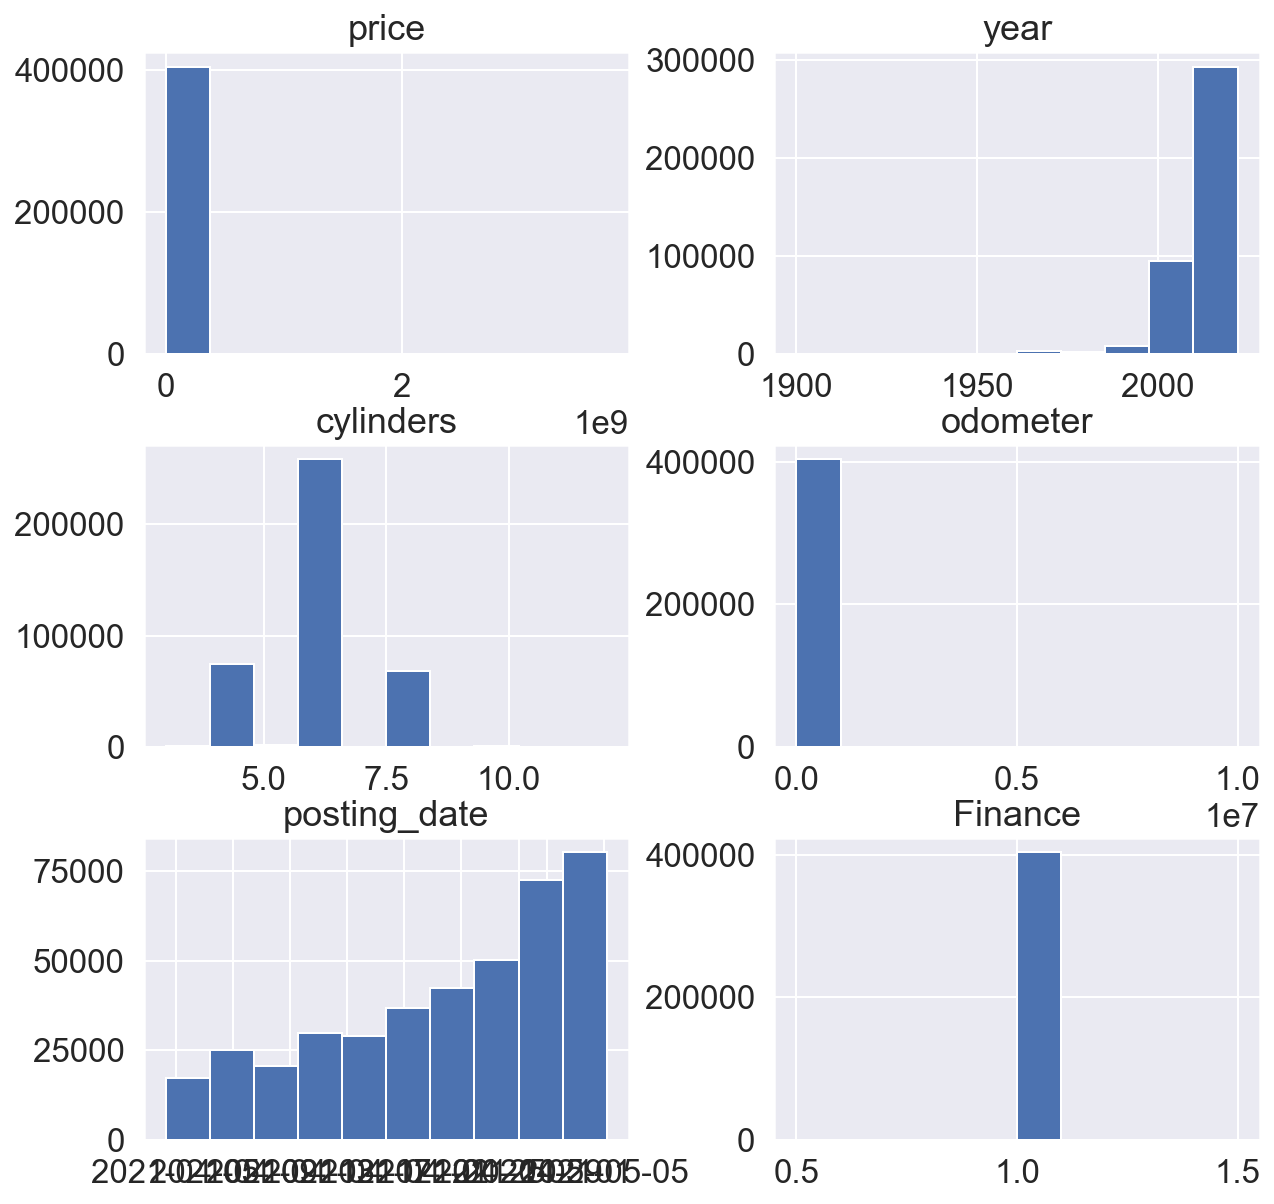

In [39]:
vehicles.hist(figsize=(10,10))
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


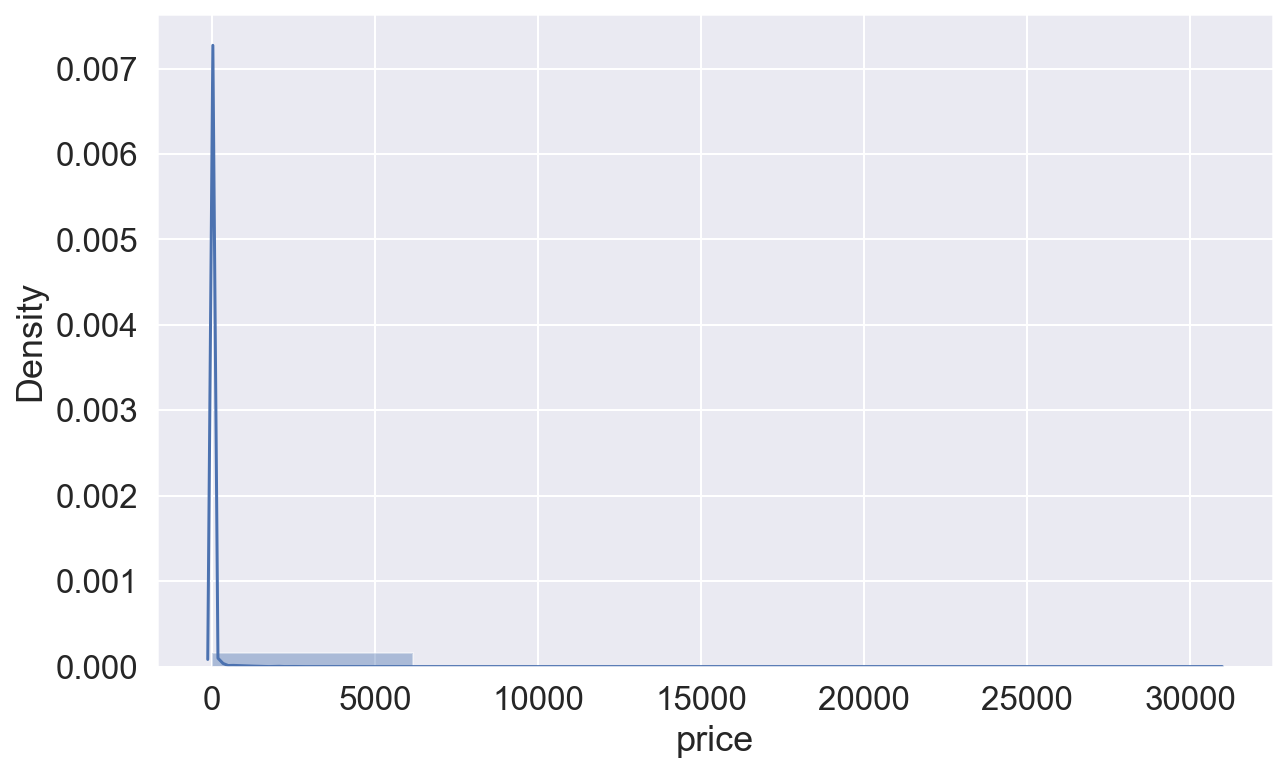

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(vehicles.price.value_counts(sort=True), bins=5, kde=True, ax=ax)
plt.show()

In [130]:
#We can observe that our prices are positively skewed ( to the right ). But we also observe a lot of outliers, 
#which make our analysis and vizualization more difficult.
#We can remove the outliers by filtering out with the Interquile Range, which is the difference between 
#first and third quartile, which are the upper and lower bound, and turn them into null values.
#We will do the same to all our numerical variables. Using the box plot, which is ideal to spot outliers.

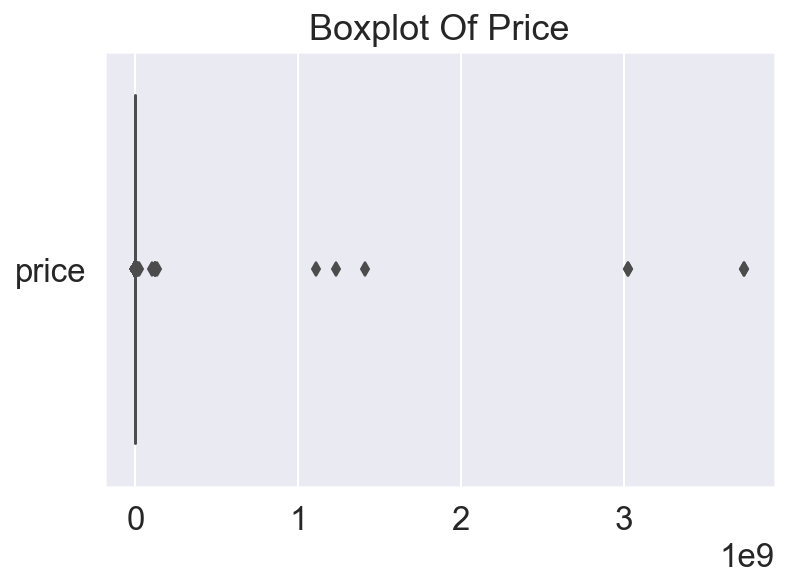

In [42]:
sns.boxplot(data=vehicles[['price']], orient='h').set_title('Boxplot Of Price')
plt.show()

In [43]:
for x in ['price']:
    q75,q25 = np.percentile(vehicles.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    vehicles.loc[vehicles[x] < min,x] = np.nan
    vehicles.loc[vehicles[x] > max,x] = np.nan

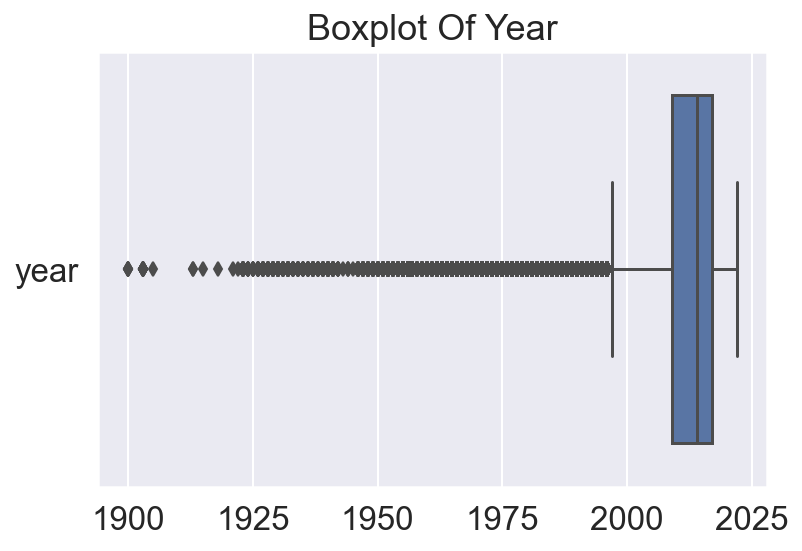

In [44]:
sns.boxplot(data=vehicles[['year']], orient='h').set_title('Boxplot Of Year')
plt.show()

In [45]:
for x in ['year']:
    q75,q25 = np.percentile(vehicles.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    vehicles.loc[vehicles[x] < min,x] = np.nan
    vehicles.loc[vehicles[x] > max,x] = np.nan

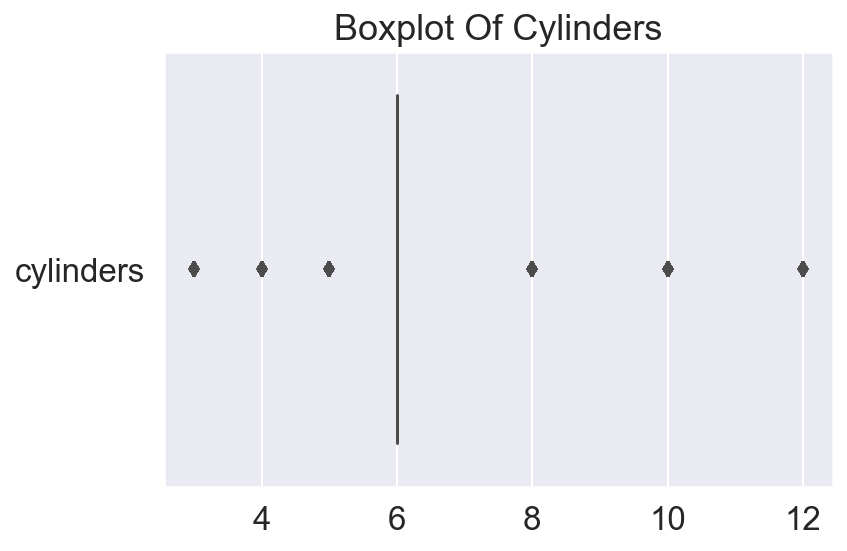

In [46]:
sns.boxplot(data=vehicles[['cylinders']], orient='h').set_title('Boxplot Of Cylinders')
plt.show()

In [47]:
for x in ['cylinders']:
    q75,q25 = np.percentile(vehicles.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    vehicles.loc[vehicles[x] < min,x] = np.nan
    vehicles.loc[vehicles[x] > max,x] = np.nan

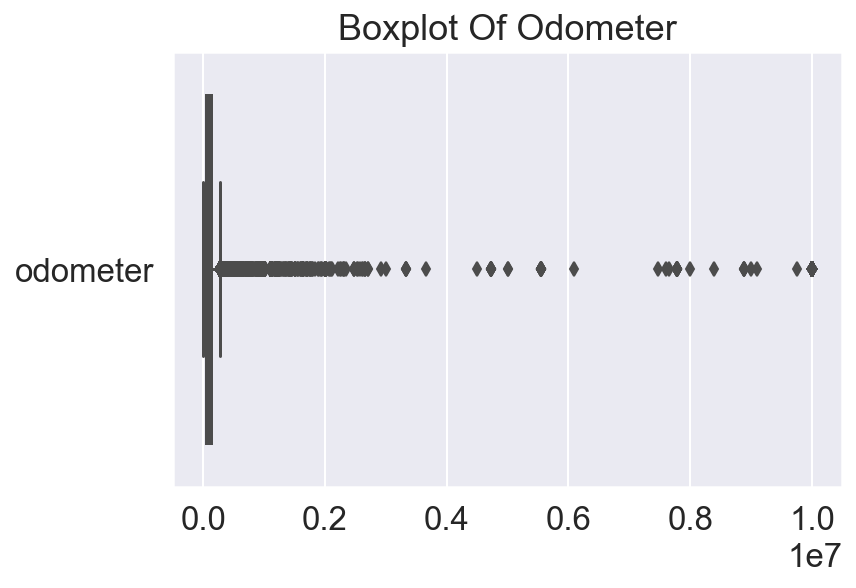

In [48]:
sns.boxplot(data=vehicles[['odometer']], orient='h').set_title('Boxplot Of Odometer')
plt.show()

In [49]:
for x in ['odometer']:
    q75,q25 = np.percentile(vehicles.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    vehicles.loc[vehicles[x] < min,x] = np.nan
    vehicles.loc[vehicles[x] > max,x] = np.nan

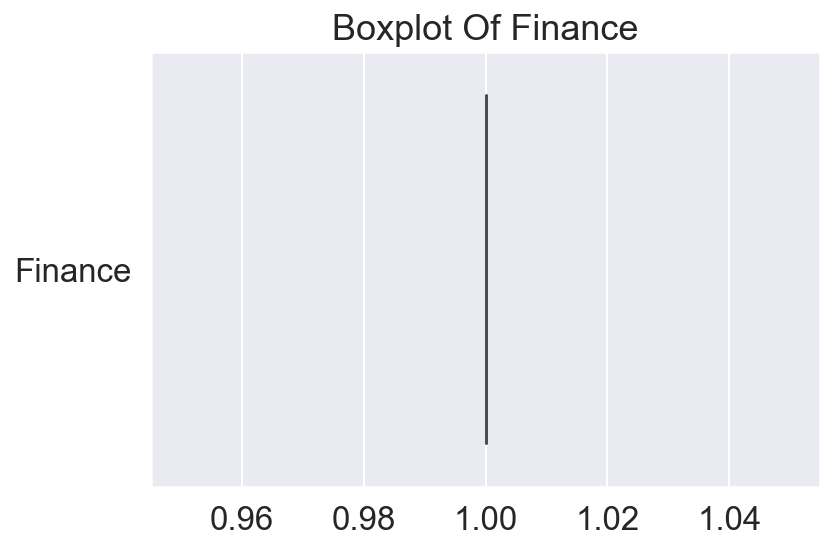

In [50]:
sns.boxplot(data=vehicles[['Finance']], orient='h').set_title('Boxplot Of Finance')
plt.show()

In [51]:
vehicles.isnull().sum()

price             7016
year             14321
manufacturer         0
model                0
condition            0
cylinders       145972
fuel                 0
odometer          3430
title_status         0
transmission         0
drive                0
type                 0
paint_color          0
state                0
posting_date         0
Finance              0
dtype: int64

In [52]:
vehicles=vehicles.dropna(axis=0)

#We drop all the outliers we gathered.

In [53]:
vehicles.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
posting_date    0
Finance         0
dtype: int64

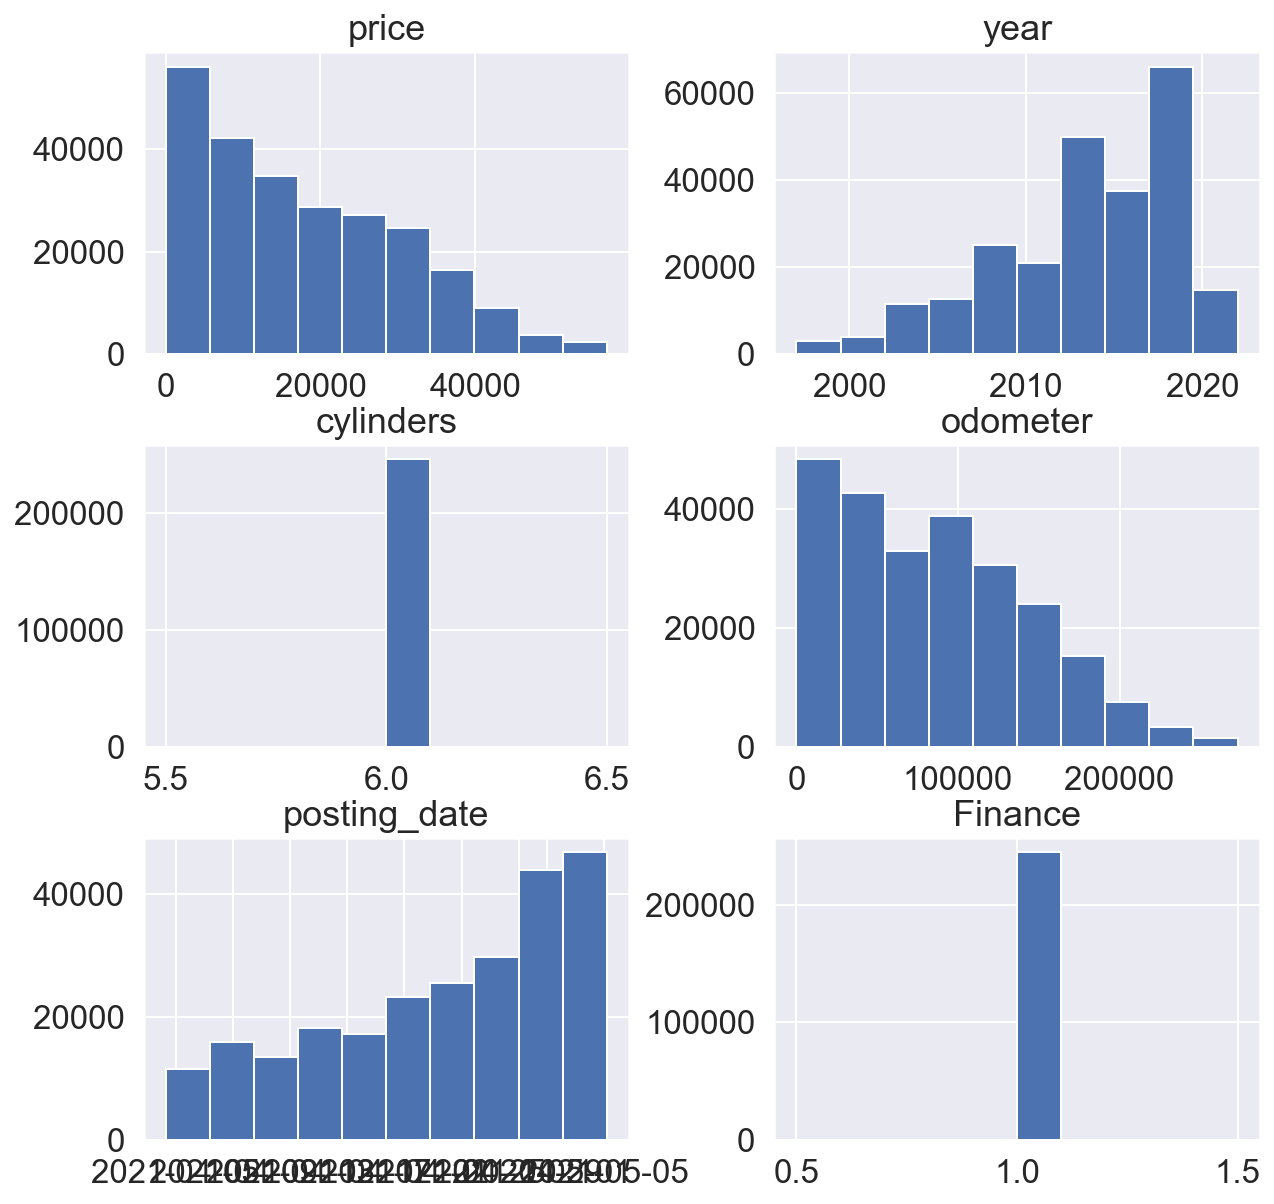

In [54]:
vehicles.hist(figsize=(10,10))
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


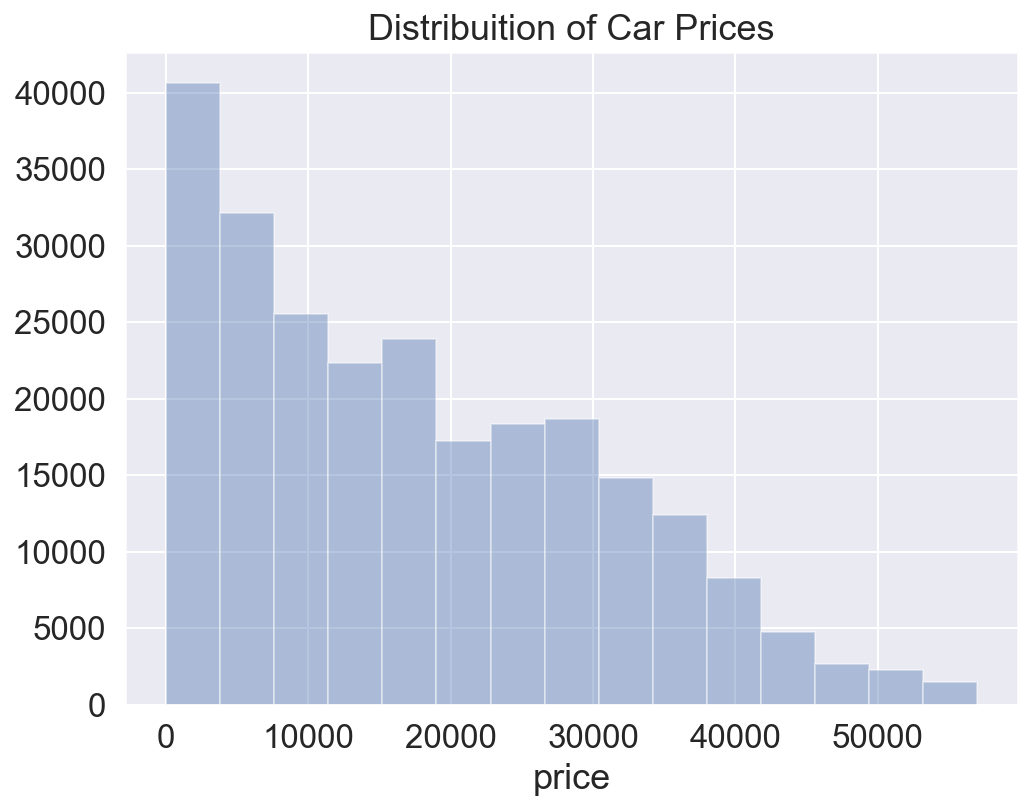

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(vehicles.price, bins=15, kde=False, ax=ax).set_title('Distribuition of Car Prices')
plt.show()

In [56]:
#We can clearly observe that prices has a right skewed, positive distribuition.
#Meaning that cars are sold less, the highter their price is. Which makes sense, people on the market for used 
#cars are usually looking for best value for the money

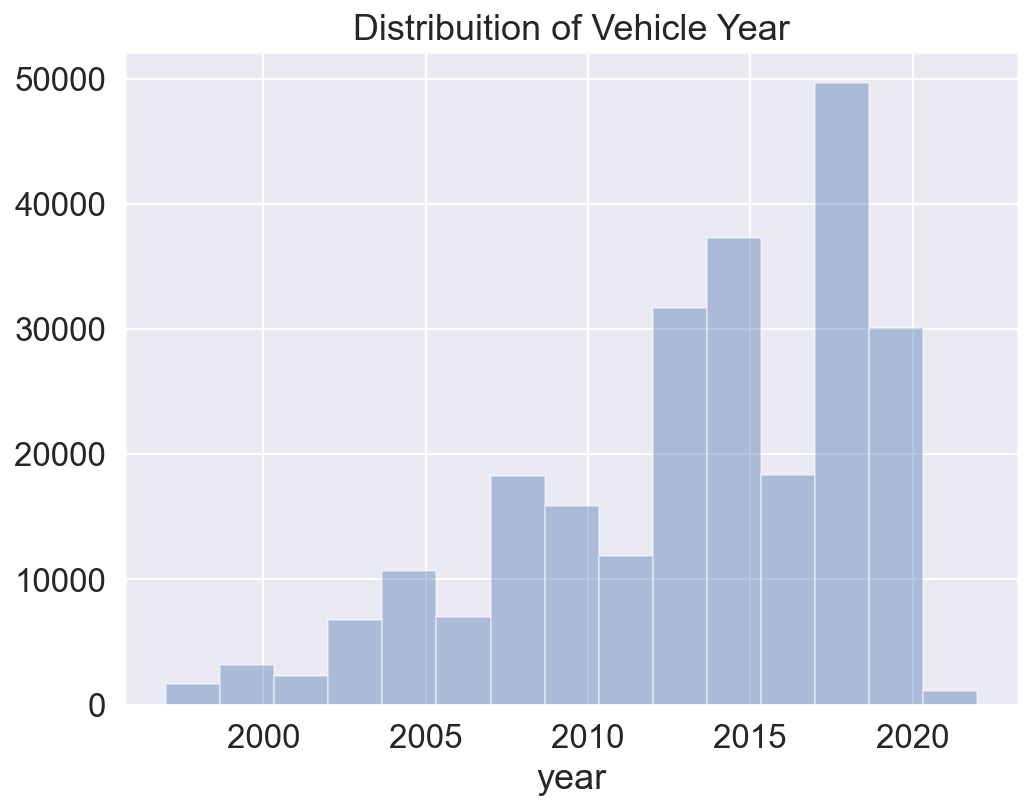

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(vehicles.year, bins=15, kde=False, ax=ax).set_title('Distribuition of Vehicle Year')
plt.show()

In [58]:
#Car year, in the other hand, follows a left skew distribuition.
#Which also makes sense, become consummers will look for a fairly new car that has already depreciated in value,
#but still mantains good quality.

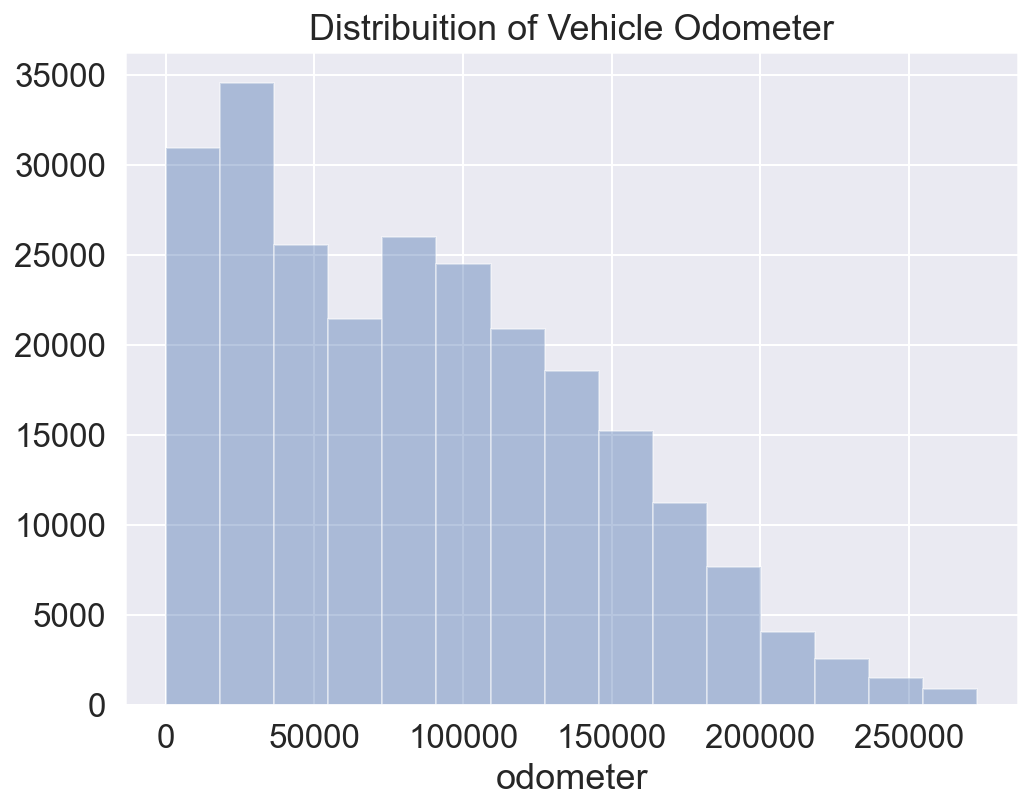

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(vehicles.odometer, bins=15, kde=False, ax=ax).set_title('Distribuition of Vehicle Odometer')
plt.show()

In [60]:
#The Odometer,also follows a right skew distribuition.
#Consummers tend to prefer cars that have less miles, as these are still considered fresh and low maintenance.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Pair plot of Numerical data')

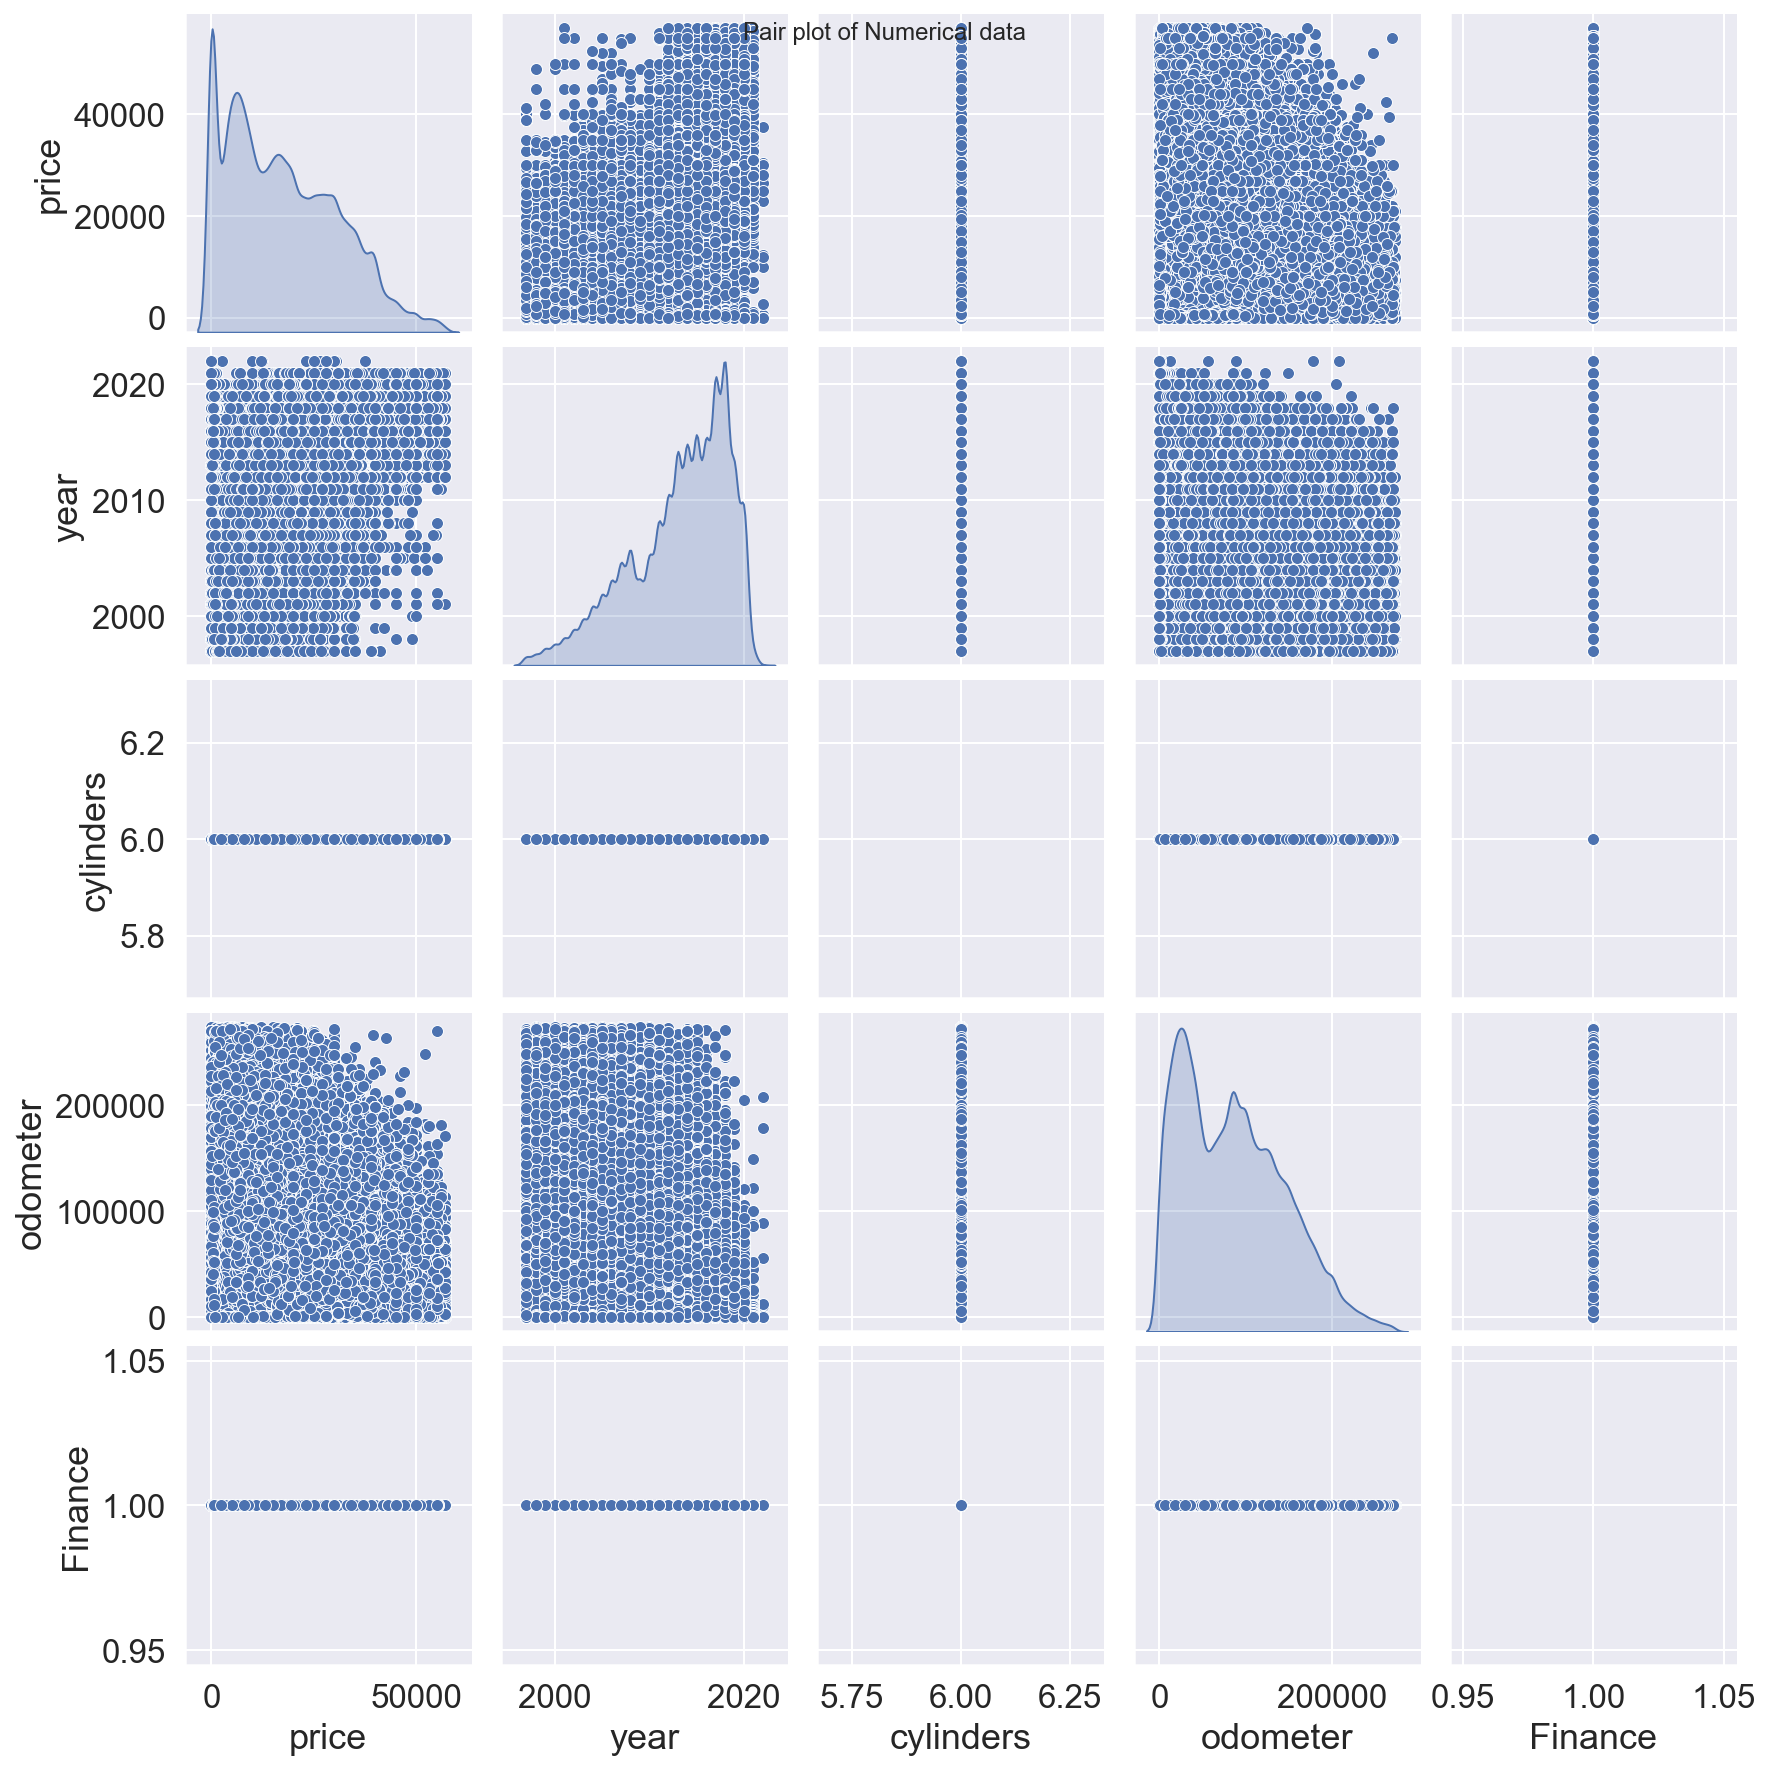

In [61]:
plot1 = sns.pairplot(vehicles,diag_kind="kde")
plot1.fig.suptitle('Pair plot of Numerical data')

## Covid cases dataset :

In [62]:
#We repeat the same EDA process for this dataset.
covid.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [63]:
covid.drop(columns=['fips'],axis=1, inplace=True)

#We drop the fips columns, as it is not important.

In [64]:
covid.dtypes

date      object
state     object
cases      int64
deaths     int64
dtype: object

In [65]:
covid['date'] = pd.to_datetime(covid['date'])
covid.dtypes

#We convert the feature into datetime type, same as our previous dataset, because we plan to Join later.

date      datetime64[ns]
state             object
cases              int64
deaths             int64
dtype: object

In [66]:
covid.rename(columns={'date':'posting_date'},inplace=True)

In [67]:
covid.head()

,posting_date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0


In [68]:
covid.state.value_counts()[:5]

Washington       563
Illinois         560
California       559
Arizona          558
Massachusetts    552
Name: state, dtype: int64

In [69]:
#Since we will joining the dataset as the 'state' link as well, its important that the state rows are
#written in the same way.


In [70]:
#We create a Dictionary to transform the state names into their respectibe abbreviations!

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [71]:
covid.state = [us_state_abbrev[x] for x in covid.state]

#We use list comprehension to pull the abreviations from the dictionary.

In [72]:
covid.state.value_counts()[:5]

WA    563
IL    560
CA    559
AZ    558
MA    552
Name: state, dtype: int64

In [73]:
covid.posting_date.min(),covid.posting_date.max(),

#We check the range of our timestamp.

(Timestamp('2020-01-21 00:00:00'), Timestamp('2021-08-05 00:00:00'))

In [74]:
covid.shape

(28669, 4)

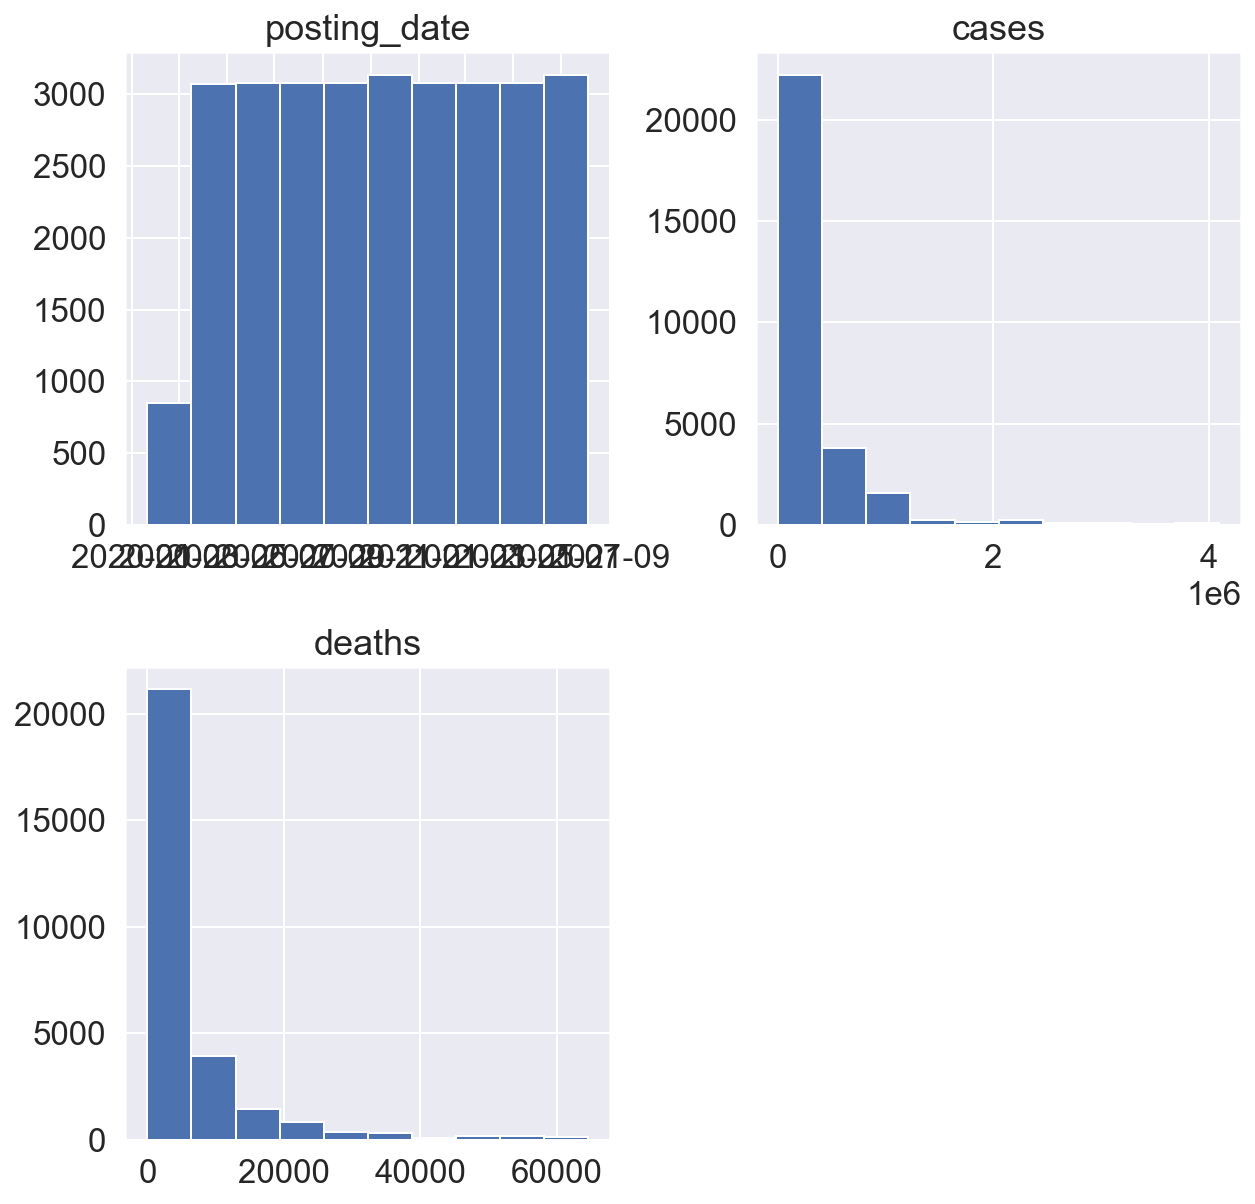

In [75]:
covid.hist(figsize=(10,10))
plt.show()

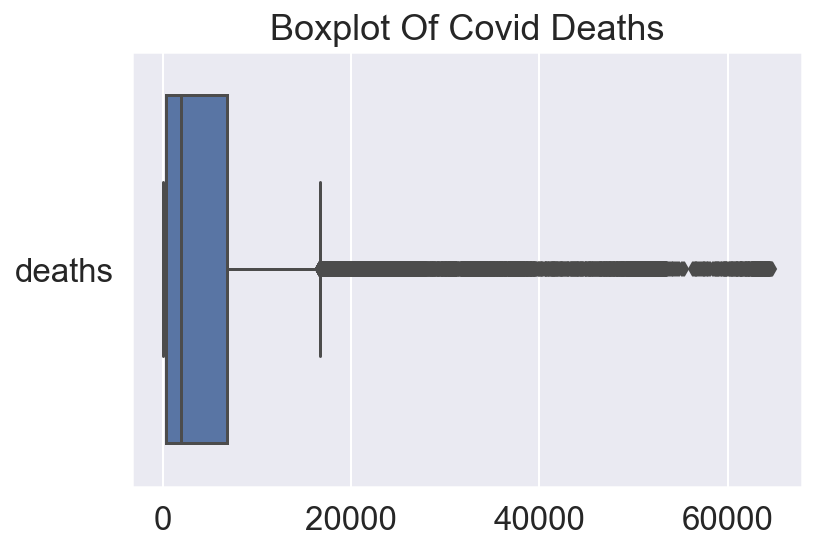

In [76]:
sns.boxplot(data=covid[['deaths']], orient='h').set_title('Boxplot Of Covid Deaths')
plt.show()

In [77]:
for x in ['deaths']:
    q75,q25 = np.percentile(covid.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    covid.loc[covid[x] < min,x] = np.nan
    covid.loc[covid[x] > max,x] = np.nan

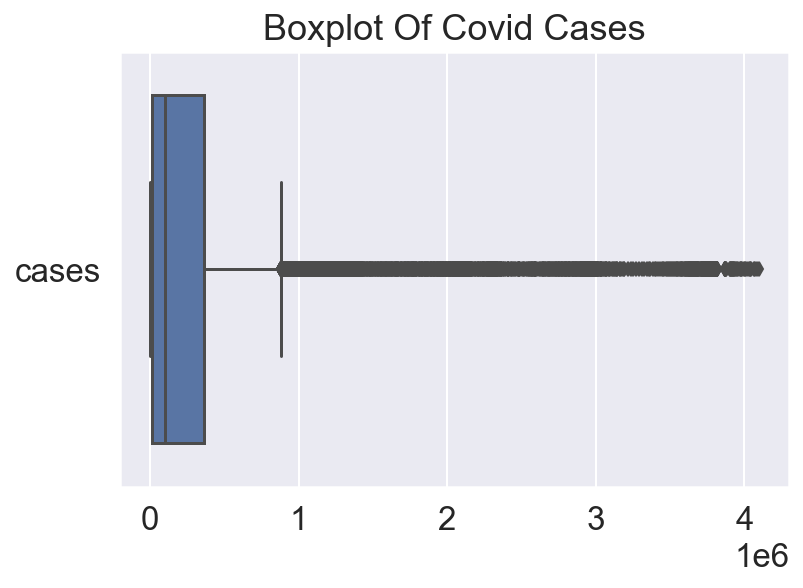

In [78]:
sns.boxplot(data=covid[['cases']], orient='h').set_title('Boxplot Of Covid Cases')
plt.show()

In [79]:
for x in ['cases']:
    q75,q25 = np.percentile(covid.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    covid.loc[covid[x] < min,x] = np.nan
    covid.loc[covid[x] > max,x] = np.nan

In [80]:
covid.isnull().sum()

posting_date       0
state              0
cases           2322
deaths          2817
dtype: int64

In [81]:
covid = covid.dropna(axis=0)

In [82]:
covid.isnull().sum()

posting_date    0
state           0
cases           0
deaths          0
dtype: int64

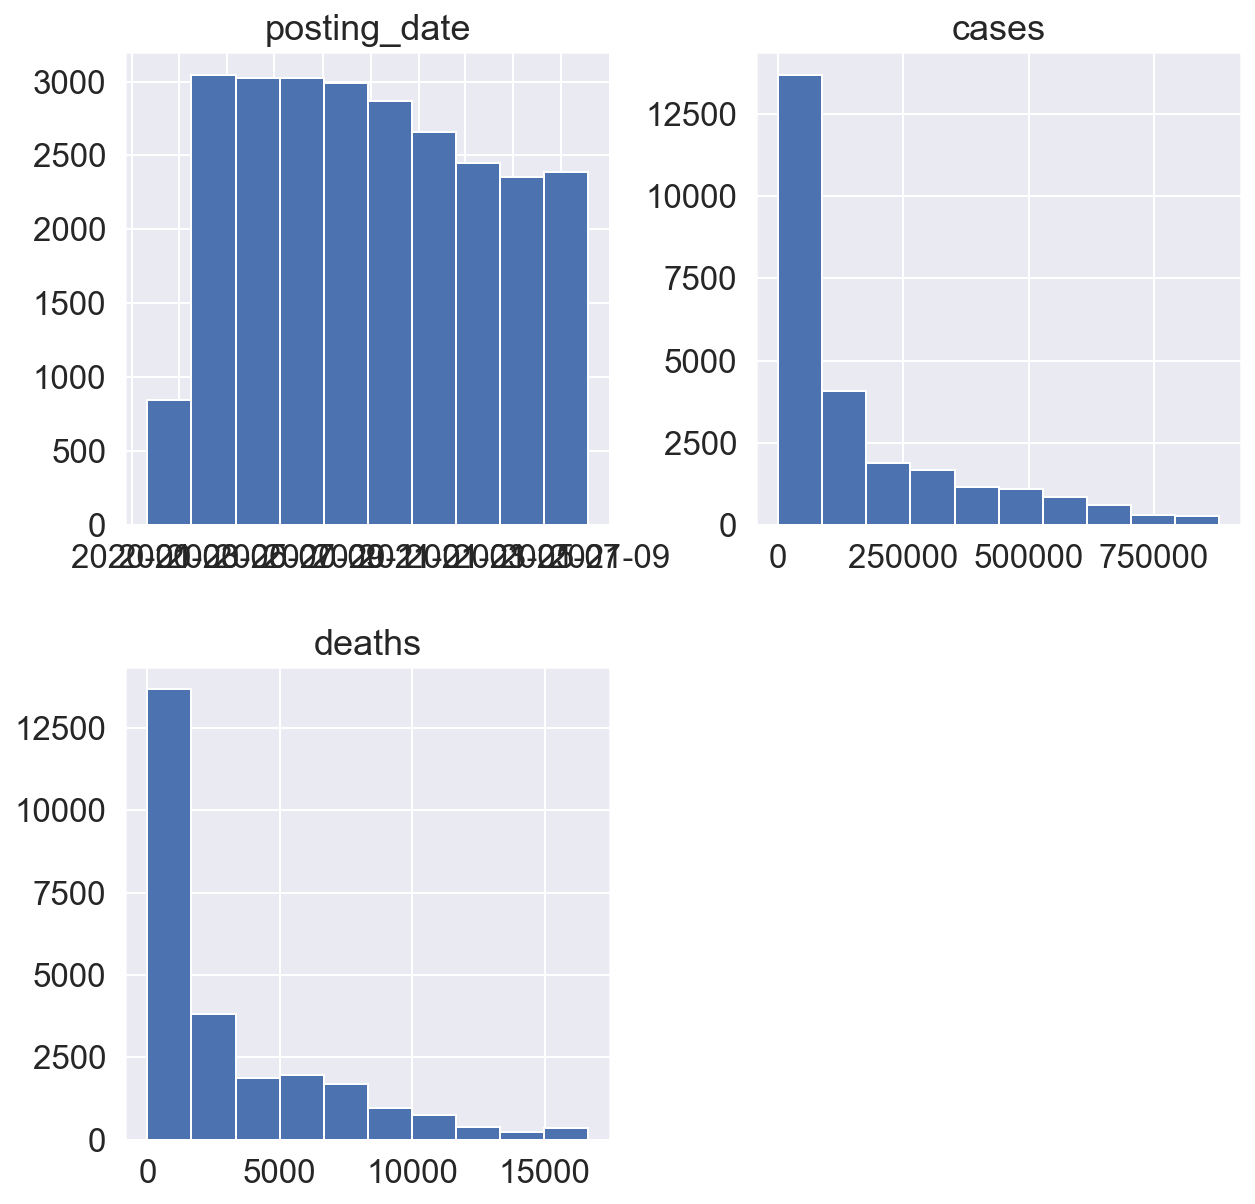

In [83]:
covid.hist(figsize=(10,10))
plt.show()

In [84]:
#The Histograms show us that, covid deathes and cases are positively skewed to the right.
#As time goes on, covid cases and deathes declined. That may be because more people started building immunity after
#catching it, or due to the vaccines.

Text(0.5, 0.98, 'Pair plot of Covid data')

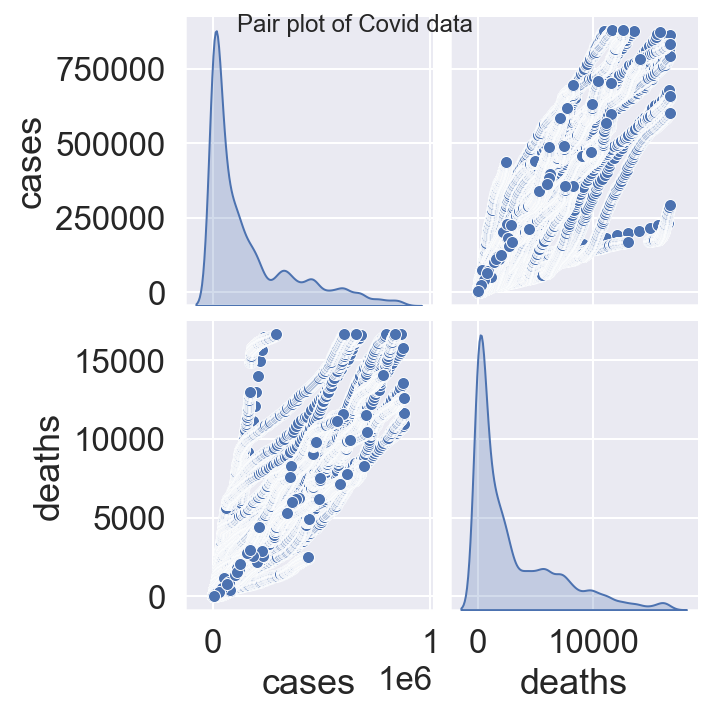

In [85]:
plot2 = sns.pairplot(covid,diag_kind="kde")
plot2.fig.suptitle('Pair plot of Covid data')

In [86]:
# There is a positive correlation between covid cases and covid deathes in the US.

# Now We merge Both DataFrames 

In [87]:
main = pd.merge_asof(vehicles,covid, on='posting_date',by='state')

#We use the merge_asof function to join the dataframes on the closest time between each other and not exact time.

In [88]:
main.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date,Finance,cases,deaths
0,18997.0,2013.0,dodge,durango,excellent,6.0,gas,96475.0,clean,automatic,4wd,SUV,black,NY,2021-04-04 07:00:25,1,233293.0,16473.0
1,51997.0,2017.0,chevrolet,silverado 2500hd,excellent,6.0,diesel,73231.0,clean,automatic,4wd,pickup,black,NY,2021-04-04 07:00:51,1,233293.0,16473.0
2,28997.0,2016.0,toyota,tacoma,excellent,6.0,gas,93407.0,clean,automatic,4wd,pickup,white,NY,2021-04-04 07:01:16,1,233293.0,16473.0
3,24900.0,2012.0,toyota,sienna,good,6.0,gas,128356.0,clean,automatic,fwd,sedan,silver,NM,2021-04-04 07:10:12,1,192152.0,3951.0
4,24900.0,2012.0,toyota,sienna,good,6.0,gas,128356.0,clean,automatic,fwd,sedan,silver,CO,2021-04-04 07:10:23,1,470757.0,6190.0


In [89]:
main.shape

(245484, 18)

In [90]:
main.posting_date.min(), main.posting_date.max()

#Check the timestamps to make sure we have the right amount of data and range

(Timestamp('2021-04-04 07:00:25'), Timestamp('2021-05-05 03:57:42'))

# Modeling 

In [124]:
#Since we are dealing with a continuos target variable, we will implement 4 models and compare the accuracy score.

#Simple Linear Regression, to check whats the linear relationship between variables.

#Decision Tree tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time 
#an associated decision tree is incrementally developed. Great for obtaining non linear relationships between features
#And variables.

#Bagging Bagging is ensemble that takes several weak models, aggregating the predictions to select the best prediction.

#Random Forest which is an ensemble of random decision trees, with average preditions, to reduce overfitting and
#Improve accuracy.

In [91]:
#Now that we have our final dataset, we can drop the state and date columns. They were only usefull for the merge.
#They are not important features to predict car prices.

main.drop(columns=['state','posting_date'],axis=1, inplace=True)

In [92]:
main.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,Finance,cases,deaths
0,18997.0,2013.0,dodge,durango,excellent,6.0,gas,96475.0,clean,automatic,4wd,SUV,black,1,233293.0,16473.0
1,51997.0,2017.0,chevrolet,silverado 2500hd,excellent,6.0,diesel,73231.0,clean,automatic,4wd,pickup,black,1,233293.0,16473.0
2,28997.0,2016.0,toyota,tacoma,excellent,6.0,gas,93407.0,clean,automatic,4wd,pickup,white,1,233293.0,16473.0
3,24900.0,2012.0,toyota,sienna,good,6.0,gas,128356.0,clean,automatic,fwd,sedan,silver,1,192152.0,3951.0
4,24900.0,2012.0,toyota,sienna,good,6.0,gas,128356.0,clean,automatic,fwd,sedan,silver,1,470757.0,6190.0


In [93]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
Le = LabelEncoder()
#Now we prepare our features and target variables for modelling.
#We use label encoder to dummify our categorical variables, instead of dummy, because it will make it faster.

main[['manufacturer','model','condition','fuel','title_status','transmission','drive',
      'type','paint_color']] = main[['manufacturer','model','condition','fuel','title_status',
                                     'transmission','drive','type','paint_color']].apply(Le.fit_transform)



In [94]:
main.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,Finance,cases,deaths
0,18997.0,2013.0,9,4252,0,6.0,2,96475.0,0,0,0,0,0,1,233293.0,16473.0
1,51997.0,2017.0,7,11399,0,6.0,0,73231.0,0,0,0,8,0,1,233293.0,16473.0
2,28997.0,2016.0,37,12041,0,6.0,2,93407.0,0,0,0,8,10,1,233293.0,16473.0
3,24900.0,2012.0,37,11021,2,6.0,2,128356.0,0,0,1,9,9,1,192152.0,3951.0
4,24900.0,2012.0,37,11021,2,6.0,2,128356.0,0,0,1,9,9,1,470757.0,6190.0


In [95]:
#Now we check the variables which have a higher correlation in respect to Price.

mainCORR=main.corr()

abs(mainCORR.price[mainCORR.price>=0.1])

price           1.000000
year            0.546639
condition       0.124787
transmission    0.356024
Name: price, dtype: float64

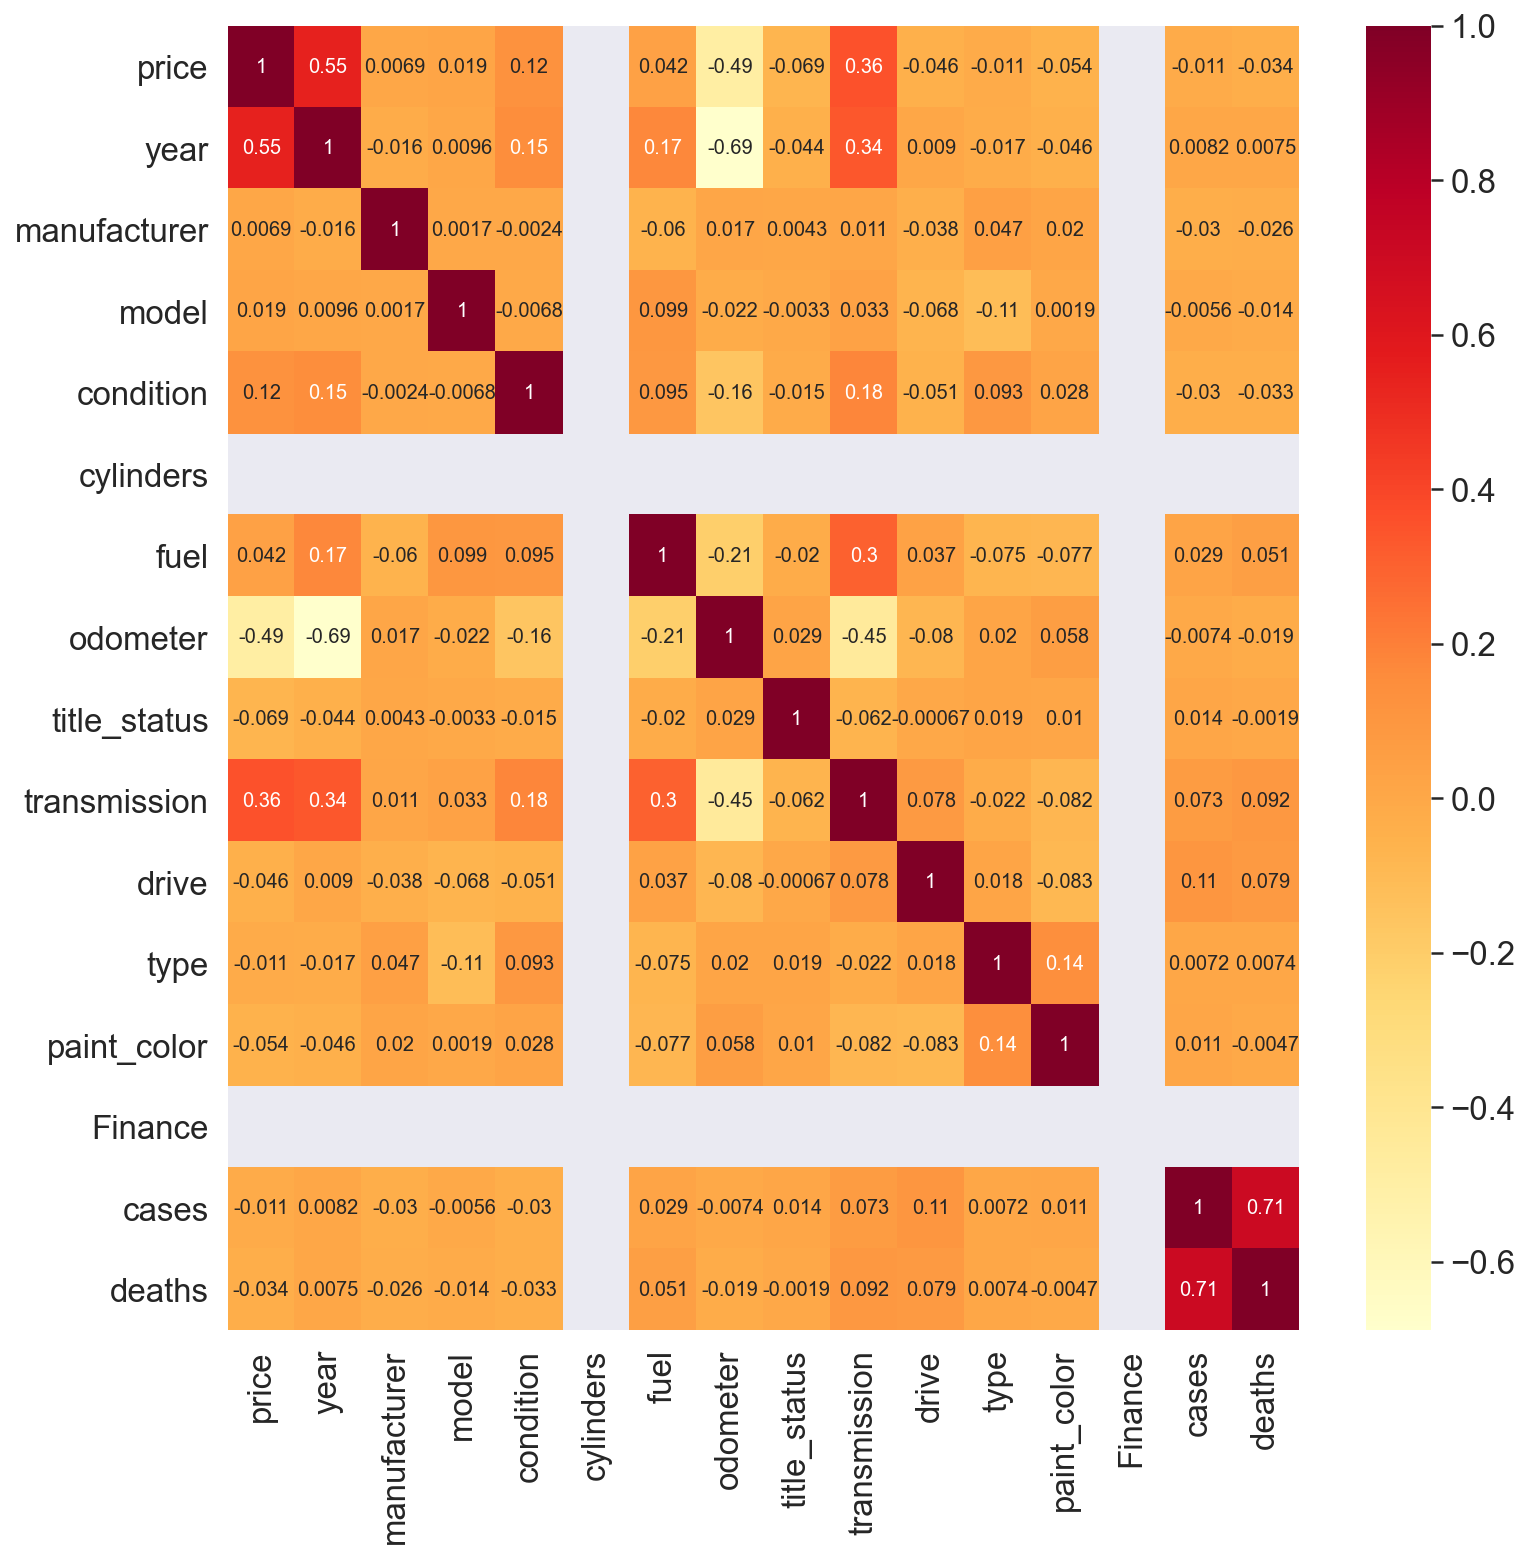

In [96]:
plt.figure(figsize=(12, 12))
sns.heatmap(main.corr(), cmap='YlOrRd',annot=True)
plt.show()

In [97]:
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


In [98]:
y= main.pop('price')
X= main

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [99]:
#We scale our models. But Since our distribuition are not normal, we use the minmaxscaler.
scaler = MinMaxScaler() 

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [100]:
#We Fit a simple Linear Regression Model. We dont need to standardize also, because we are not using regularization,
#Since our cleaning was quite agressive.

Lrmodel = LinearRegression()
Lrmodel.fit(X_train, y_train)

predictions_train = Lrmodel.predict(X_train)
predictions_test = Lrmodel.predict(X_test)
print('Training Score:', Lrmodel.score(X_train, y_train))
print('Test Score:', Lrmodel.score(X_test, y_test))
print('The Intercept is:',Lrmodel.intercept_)

# Perform 5-fold cross validation without shuffling
cv_scores = cross_val_score(Lrmodel, X_train, y_train, cv=5,n_jobs=-2,verbose=2)
print('Cross validation score:', cv_scores)
print('Mean cross validation score:', cv_scores.mean())

Training Score: 0.36483986287955095
Test Score: 0.365338425326856
The Intercept is: 8940.330013922605


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


Cross validation score: [0.36569596 0.37096101 0.36311153 0.36024567 0.36352649]
Mean cross validation score: 0.3647081323358596


[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    2.8s finished


In [114]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(Lrmodel.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values(by='coef_abs')

,coefficients,coef_abs
cylinders,0.000000,0.000000
Finance,0.000000,0.000000
type,84.669572,84.669572
manufacturer,138.687504,138.687504
model,490.617559,490.617559
condition,890.134847,890.134847
paint_color,-993.627795,993.627795
cases,1180.529089,1180.529089
deaths,-2614.027090,2614.027090
drive,-2865.959963,2865.959963


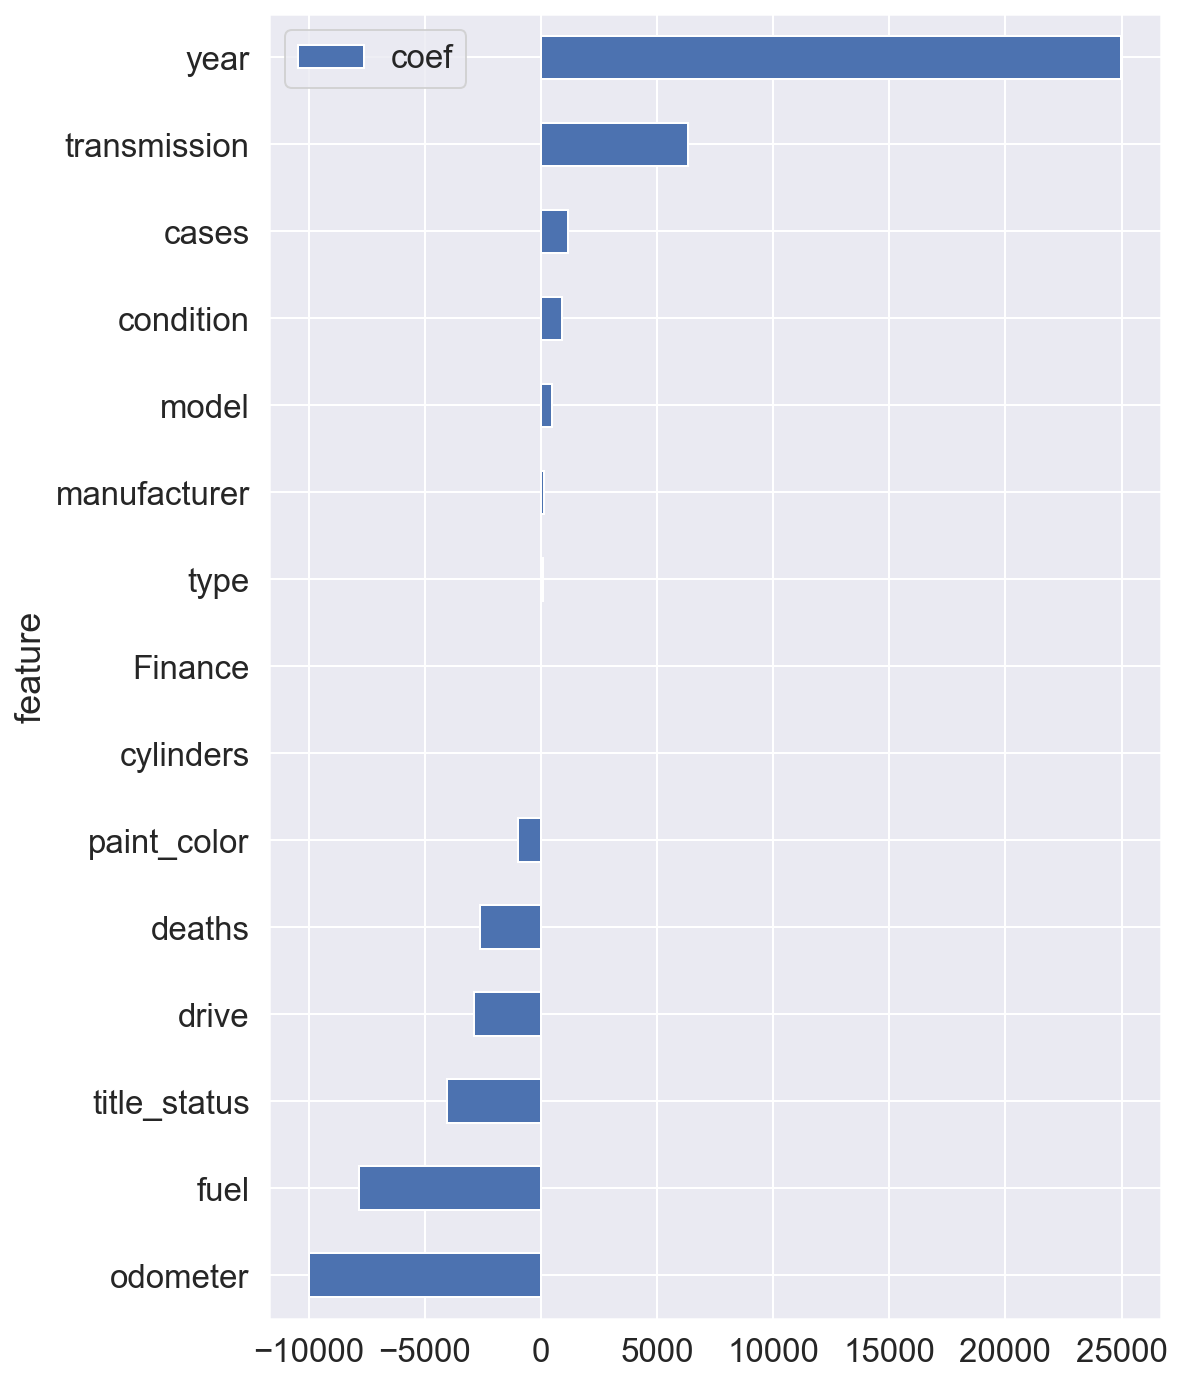

In [115]:
pd.DataFrame(list(zip(X_train.columns, Lrmodel.coef_)), 
             columns=['feature', 'coef'])\
    .sort_values(by='coef') \
    .plot(kind='barh', x='feature', y='coef', figsize=(8, 12))
plt.show()

# By plotting the magnitude of the coefficients, we can observe that 'year' is the feature with the biggest
# influence to predict the price of a used car.
#For every unit increase on the year , the price increases by 24972.4 $.

In [147]:
df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predictions_test})
df1 = df.head(25)
df1.reset_index(drop=True,inplace=True)
round(df1,2)

,Actual Price,Predicted Price
0,22000.0,13465.28
1,2900.0,6724.48
2,29988.0,18926.76
3,362.0,16390.35
4,10895.0,9939.62
5,15495.0,17202.13
6,12950.0,16329.94
7,2399.0,4162.36
8,1500.0,-1562.77
9,2000.0,-1002.83


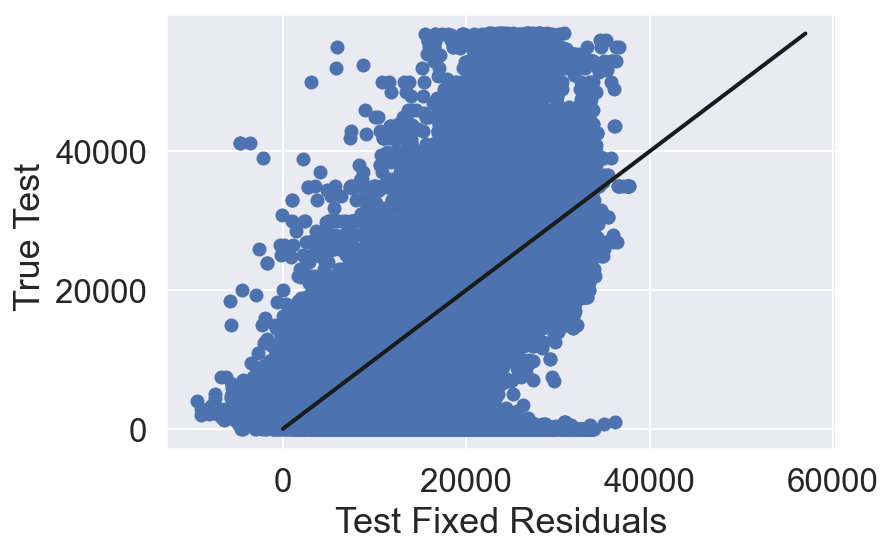

In [148]:
point_1 = [y_test.min(), y_test.max()]
plt.scatter(predictions_test, y_test)
plt.plot(point_1, point_1, c='k', lw=2)
plt.xlabel("Test Fixed Residuals")
plt.ylabel("True Test ")
plt.show()


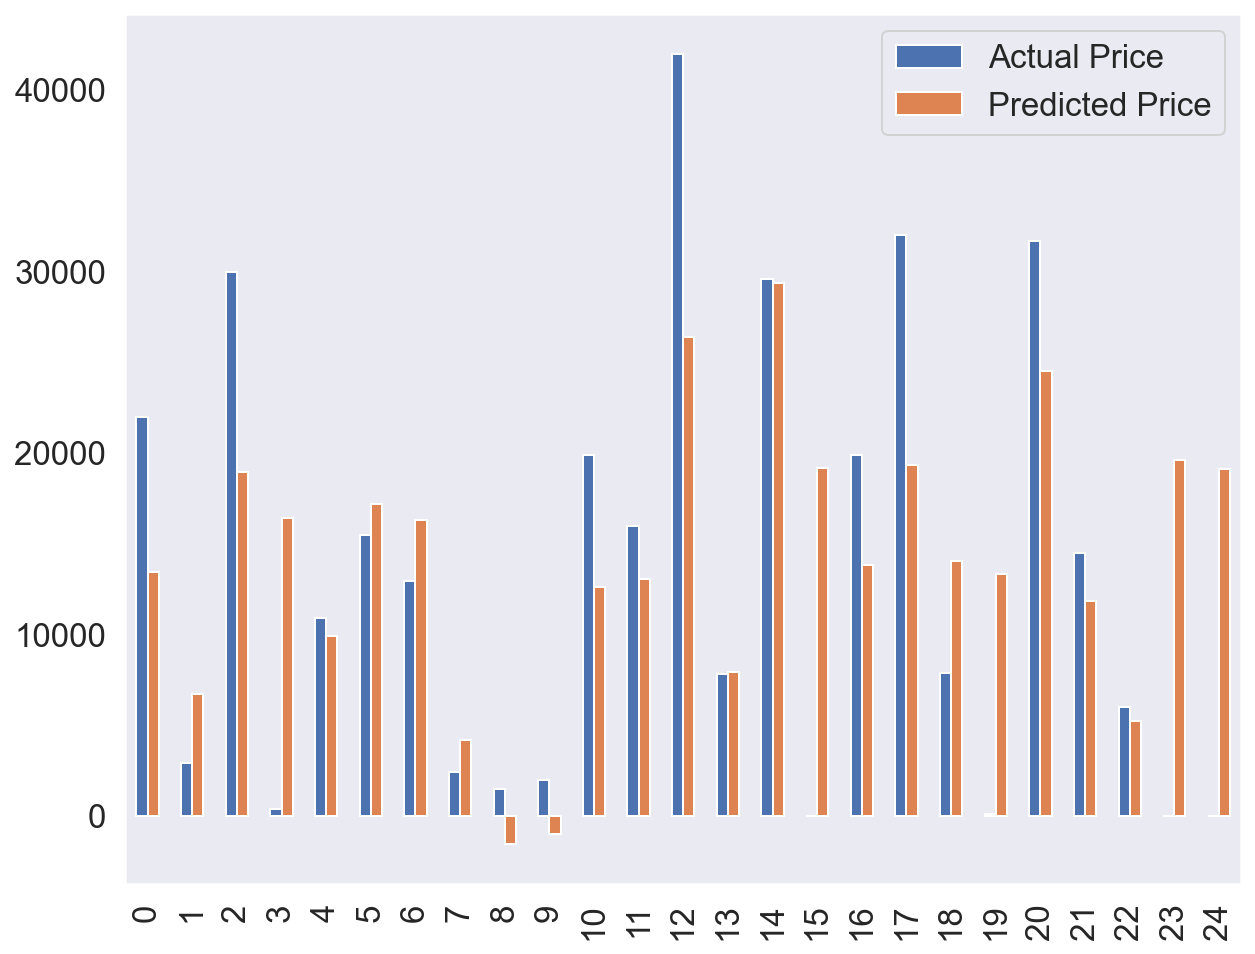

In [149]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [133]:
# Our predictions are a bit far off, there is definetely room for improvement!

In [111]:
#We Fit a Decision Tree Regressor
dtR = DecisionTreeRegressor(max_depth=100,max_features=1.0)
dtR.fit(X_train, y_train)

print(dtR.score(X_train, y_train))
print(cross_val_score(dtR, X_train, y_train, cv=5,n_jobs=-2,verbose=2).mean())
print(dtR.score(X_test, y_test))

0.9959577636913526


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


0.646218276568715
0.6796084411707779


[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    1.5s finished


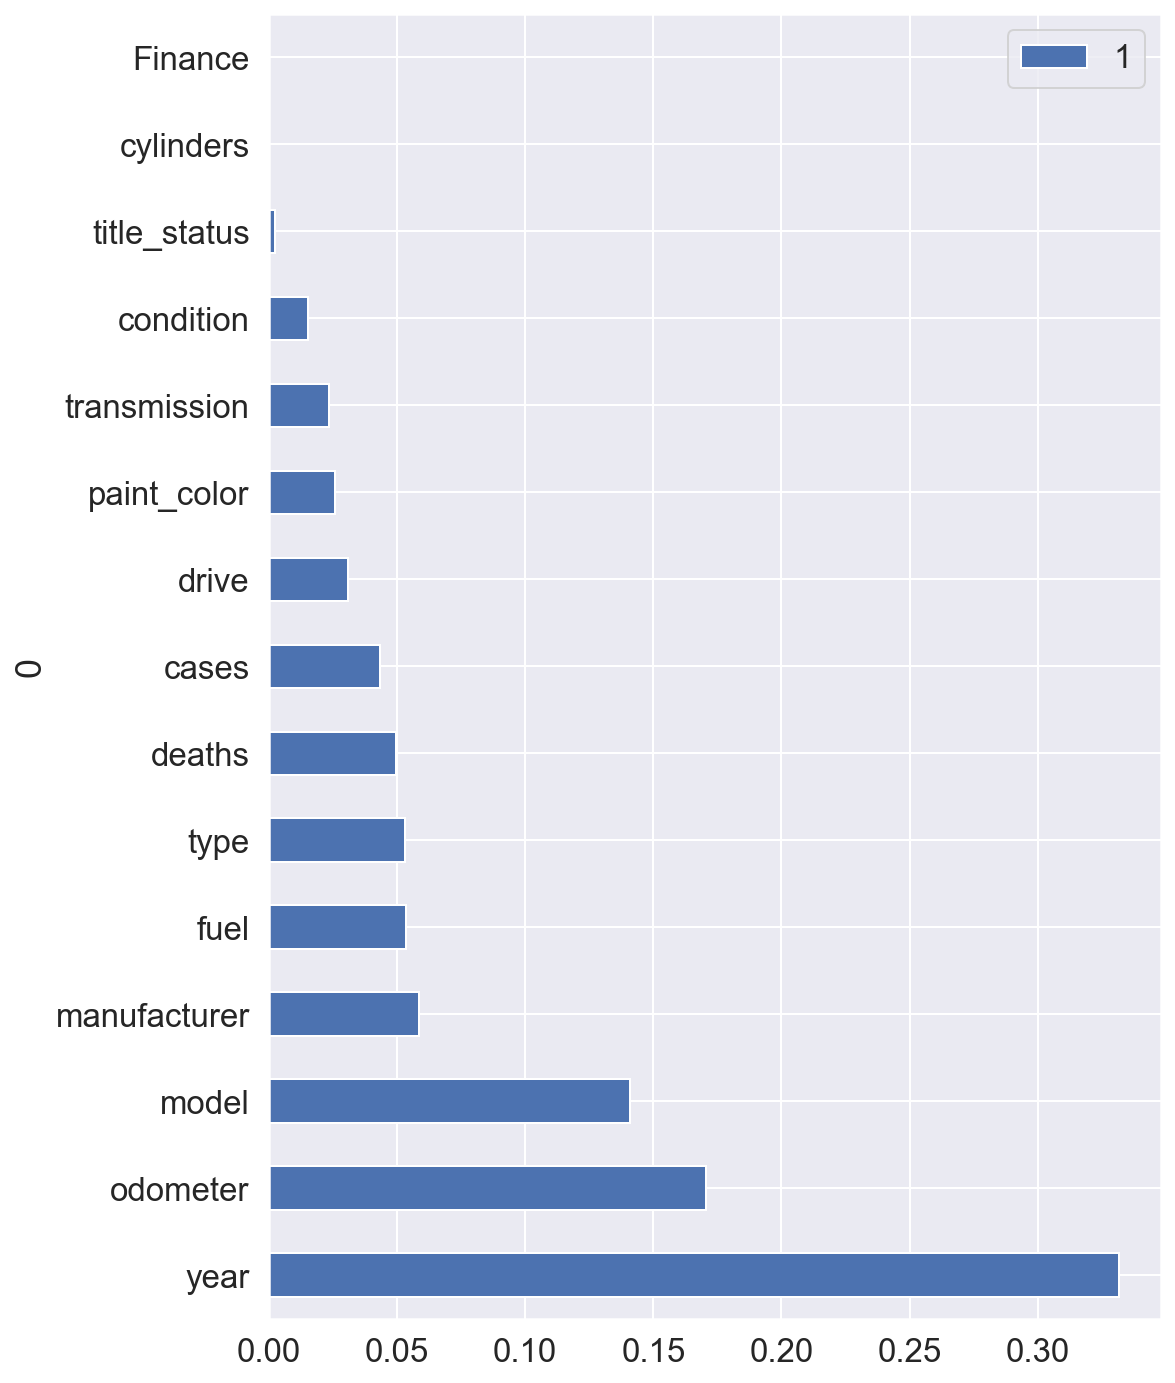

In [119]:
pd.DataFrame(list(zip(X_train.columns, dtR.feature_importances_))
            ).sort_values(by=1, ascending=False
                         ).plot(kind='barh', x=0, y=1,figsize=(8, 12))
plt.show()

In [104]:
#We Fit a Bagging Tree Regressor

bagging = BaggingRegressor(None,n_estimators=100,max_samples=1.0, max_features=1.0,random_state=1)
bagging.fit(X_train, y_train)

print(bagging.score(X_train, y_train))
print(cross_val_score(bagging, X_train, y_train, cv=5,n_jobs=-2,verbose=2).mean())
print(bagging.score(X_test, y_test))

0.972366381333049


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:  1.3min finished


0.81069628545121
0.8323110916335739


In [113]:
#We Fit a Random Forest Regressor

forest = RandomForestRegressor(n_estimators=100, max_features=1.0,random_state=1)
forest.fit(X_train, y_train)

print(forest.score(X_train, y_train))
print(abs(cross_val_score(forest, X_train, y_train, cv=5,n_jobs=-2,verbose=2)).mean())
print(forest.score(X_test, y_test))

0.9723815648529588


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:  1.3min finished


0.8105490227195473
0.8323361656944727


In [151]:
fi = pd.DataFrame({
    'feature': X.columns,
    'importance': forest.feature_importances_
})

fi.sort_values('importance', ascending=False, inplace=True)
fi.reset_index(drop=True,inplace=True)
fi

,feature,importance
0,year,0.331354
1,odometer,0.167521
2,model,0.142610
3,manufacturer,0.057992
4,type,0.054330
5,fuel,0.053077
6,deaths,0.050012
7,cases,0.043844
8,drive,0.031546
9,transmission,0.025771


The feature_importances_ attribute ranks the features according to their importance.
The ranking is based on an importance measure ranging from 0 to 1, with 1 being the most important.
The importance scores of all features add up to 1.

The score takes into account how many times the feature was used to make a decision, how many data points were 
involved in each decision and how much the decision increased the purity of the node.
A feature with higher feature importance reduced the criterion (impurity) more than the other features.

Random Forrest and Bagging gave us the best CV score of 0.81.
With the help of data vizualization and exploratory data analysis, we can conclude that there is not a significant
relation between covid cases and deathes, and car prices. Even though its still enough to make an impact and 
affect the price. Its still not the most important features, among others life car Year of Purchase, odometer Miles
And car model.

A few other things we could have done to further improve our model's scores, would be to further optimize the 
parameters of our Linear Regression. We could obtain a better score by using the gridsearch.
Another method I would also like to try would be to implement NLP, Natural languague Processing,
to identify words that could further predict our price on the Description column.
I believe that would increase our accuracy even further.


### - What limitations affect these findings ?
Lack of numerical features, so spearman correlation was not very useful. Lack of datetime observations .
Better EDA could have been done in description and cylinders columns, given more time.
